In [4]:
import gymnasium as gym
import random
import numpy as np
import matplotlib.pyplot as plt
env = gym.make("Acrobot-v1", render_mode="human")

In [7]:
class QLearnerSolver:
    def __init__(self,env):
        self.q_table = {}
        self.alpha = 0.1
        self.gamma = 0.95
        self.epsilon = 0.1
        self.env = env
        self.action_space = list(range(env.action_space.n))
        self.state_space_size = [3,3,3,3,6,6]
        self.q_table = np.zeros(self.state_space_size + [env.action_space.n])


    def convert_cont_to_discrete_space(self,state):
        if isinstance(state, tuple):        
            state = state[0]
        bucket_edgesv = np.linspace(-1, 1, 3)
        bucket_edgesvdot = np.linspace(-1, 1, 3)
        bucket_edgestheta = np.linspace(-1, 1, 3)
        bucket_edgesthetadot = np.linspace(-1, 1, 3)
        bucket1 = np.linspace(-12.567,12.567,6)
        bucket2 = np.linspace(-28.274, 28.274,6)
        bucket_indexv = np.digitize(state[0], bucket_edgesv) - 1
        bucket_indexvtheta = np.digitize(state[1], bucket_edgesvdot) - 1
        bucket_indexdot = np.digitize(state[2], bucket_edgestheta) - 1
        bucket_indexdottheta = np.digitize(state[3], bucket_edgesthetadot) - 1
        bucket12 = np.digitize(state[4], bucket1) - 1
        bucket13 = np.digitize(state[5],bucket2) -1
        return tuple([bucket_indexv,bucket_indexvtheta,bucket_indexdot,bucket_indexdottheta,bucket12,bucket13])

    def choose_action(self, state):
        # if the random is more than epsilon
        if random.uniform(0,1) < self.epsilon:
            return self.env.action_space.sample()
        else:
            discretized_state = self.convert_cont_to_discrete_space(state)
            q_values = self.q_table[discretized_state]
            return np.argmax(q_values)

        
    def learn(self, num_episodes):
        total_rewards = []
        for learning_epoch in range(num_episodes):
            state = env.reset()     
            total_reward = 0                 #every episode, reset the environment to the original configuration
            for time_step in range(500):
                action = self.choose_action(state) #learner chooses one of these actions
                next_state,reward,done,_,_=env.step(action)  #the action is taken, a reward and new state is returned
                discretized_state = self.convert_cont_to_discrete_space(state)

                # Use Q-learning update rule
                max_q_next = np.max(self.q_table[self.convert_cont_to_discrete_space(next_state)])
                self.q_table[discretized_state + (action,)] += self.alpha * (reward + self.gamma * max_q_next - self.q_table[discretized_state + (action,)])

                state = next_state
                total_reward += reward 
                
                if done:
                    total_reward = total_reward + reward
                    break


                # update total reward
                total_reward = total_reward + reward
            total_rewards.append(total_reward)
        return total_rewards

In [8]:
env = gym.make('Acrobot-v1')
learner1=QLearnerSolver(env)
total_rewards = learner1.learn(500)


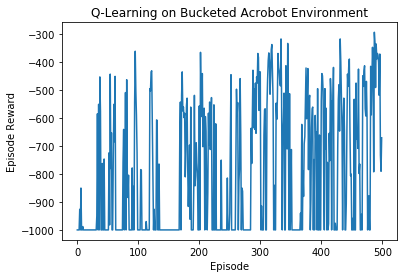

In [9]:
plt.plot(range(0, 500), total_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.title("Q-Learning on Bucketed Acrobot Environment")
plt.show()